In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
insurance = pd.read_csv('../data/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<function matplotlib.pyplot.show(close=None, block=None)>

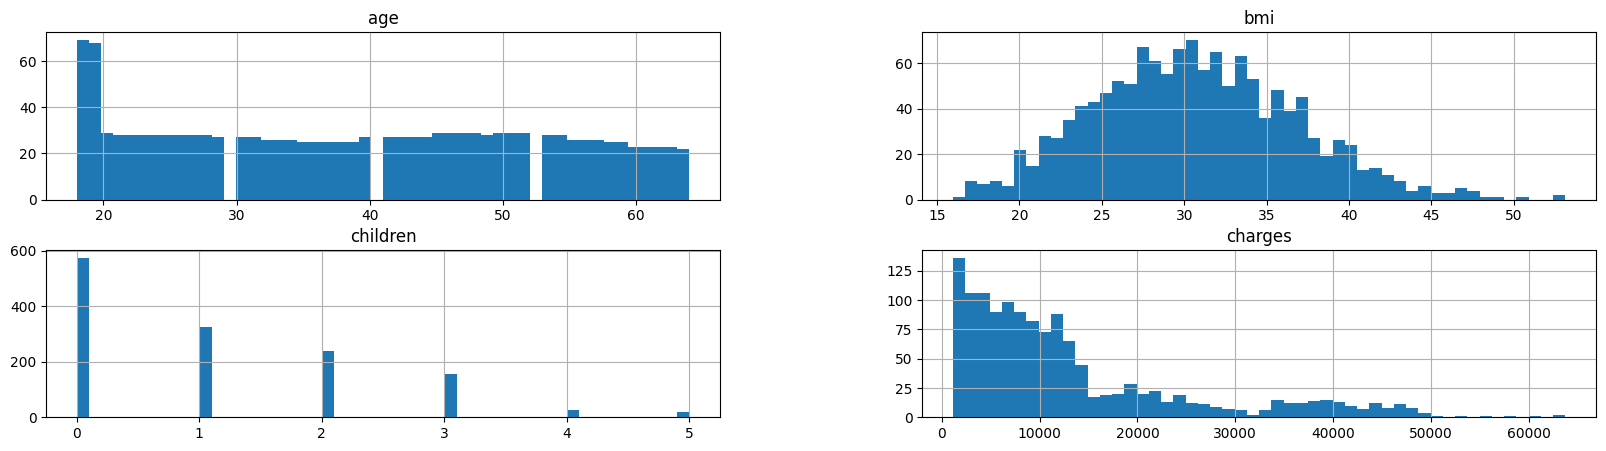

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

insurance.hist(bins=50,figsize=(20,5))
plt.show

In [3]:
insurance.describe()
insurance.info()
insurance.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

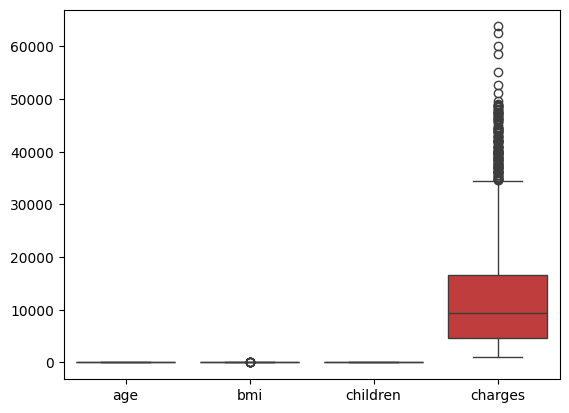

In [4]:
import seaborn as sns
sns.boxplot(data=insurance)

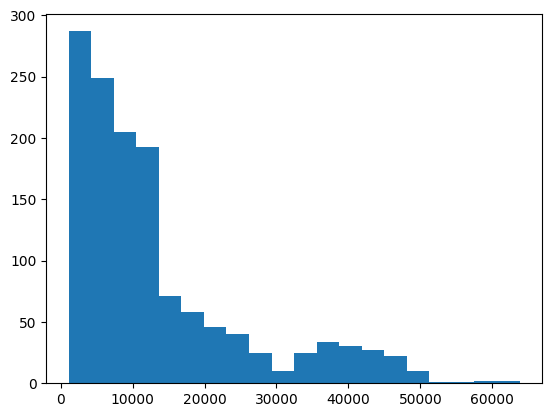

In [5]:
import matplotlib.pyplot as plt

plt.hist(insurance['charges'], bins=20)
plt.show()


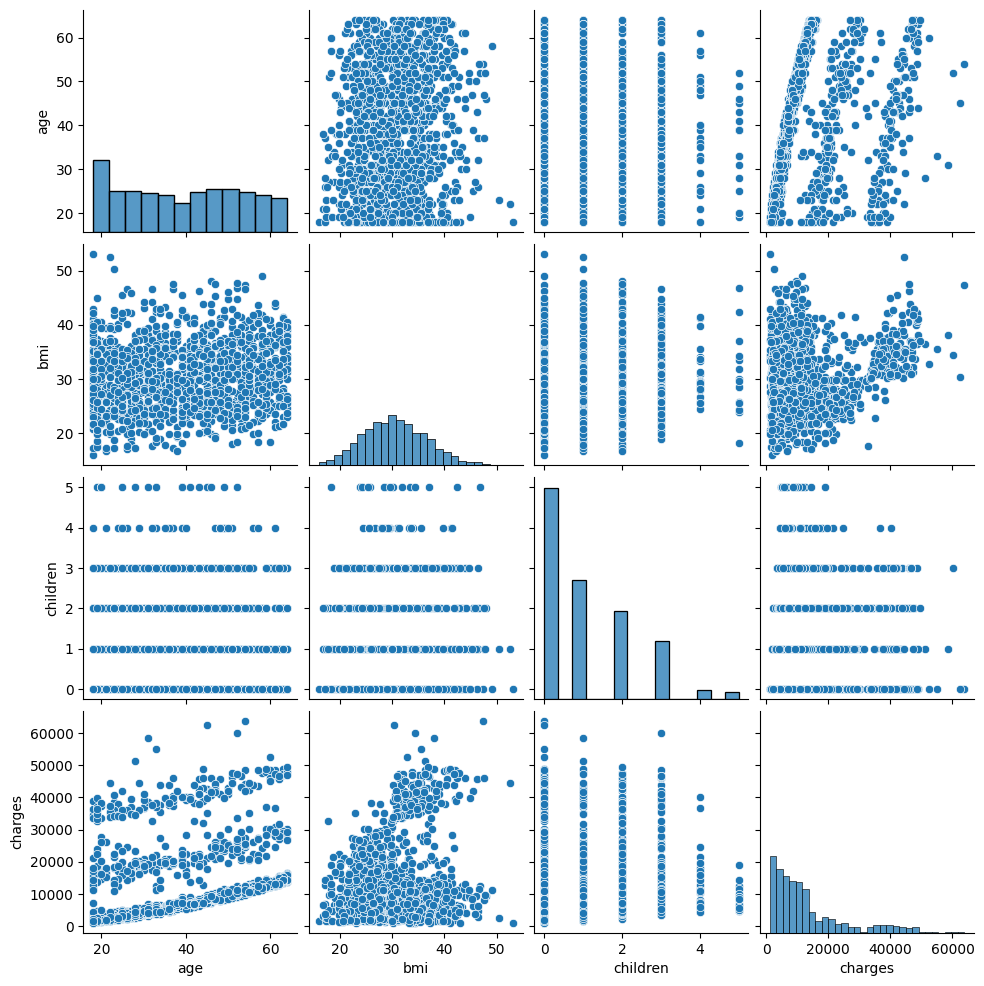

In [6]:
sns.pairplot(insurance)


In [7]:
insurance['charges_cat'] =  pd.cut(insurance['charges'], bins=[0.,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])


In [8]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(insurance[['region', 'smoker', 'sex']])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['region', 'smoker', 'sex'])
)
 
insurance_encoded = pd.concat([insurance.drop(['region', 'smoker', 'sex'], axis=1), encoded_df], axis=1)

corr_matrix = insurance_encoded.corr()
corr_matrix['charges'].sort_values(ascending=True)


smoker_no          -0.787251
sex_female         -0.057292
region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
charges_cat              NaN
Name: charges, dtype: float64

In [10]:
insurance.groupby('smoker')['charges'].mean()


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [11]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(insurance[['region', 'smoker', 'sex']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['region', 'smoker', 'sex']))

insurance_encoded = pd.concat(
    [insurance.drop(['region', 'smoker', 'sex'], axis=1), encoded_df],
    axis=1
)

corr_matrix = insurance_encoded.corr()
corr_matrix['charges'].sort_values(ascending=False)


charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
charges_cat              NaN
Name: charges, dtype: float64

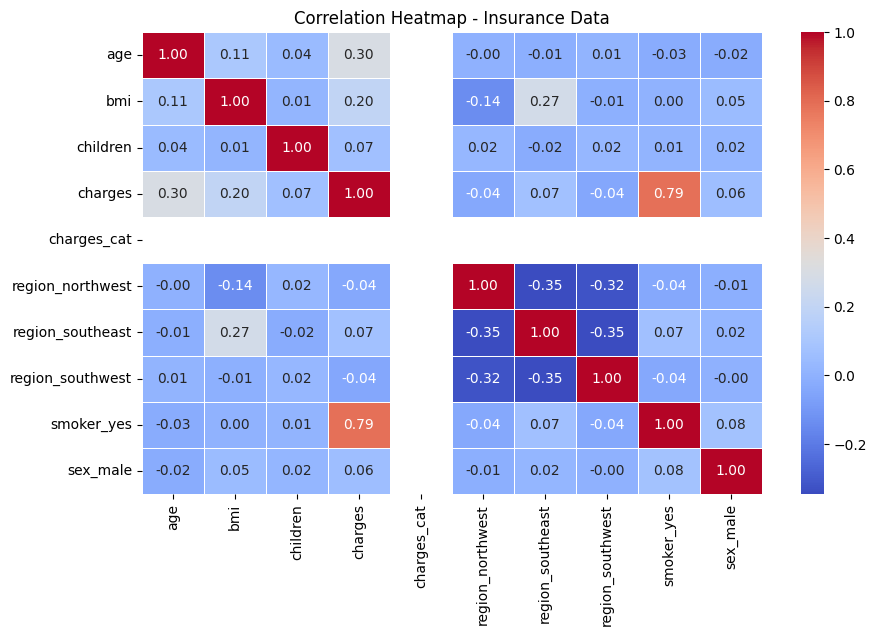

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Insurance Data")
plt.show()

In [13]:
insurance_encoded['age_bmi_interaction'] = insurance['age']*insurance['bmi']
insurance_encoded['bmi_smoker_interaction'] = insurance['bmi']*(insurance['smoker'] == 'yes').astype(int)


In [14]:
insurance_encoded['age_squared'] = insurance_encoded['age']**2
insurance_encoded['bmi_squared'] = insurance_encoded['bmi']**2

In [15]:
corr_matrix = insurance_encoded.corr()
corr_matrix['charges'].sort_values(ascending=True)

region_southwest         -0.043210
region_northwest         -0.039905
sex_male                  0.057292
children                  0.067998
region_southeast          0.073982
bmi_squared               0.192981
bmi                       0.198341
age                       0.299008
age_squared               0.300772
age_bmi_interaction       0.334754
smoker_yes                0.787251
bmi_smoker_interaction    0.845120
charges                   1.000000
charges_cat                    NaN
Name: charges, dtype: float64

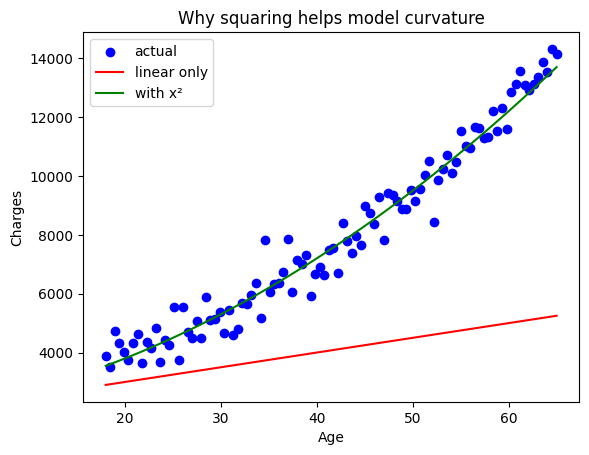

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(18, 65, 100)
charges = 2000 + 50*x + 2*(x**2) + np.random.randn(100)*500  # curved pattern

plt.scatter(x, charges, color='blue', label='actual')
plt.plot(x, 2000 + 50*x, color='red', label='linear only')
plt.plot(x, 2000 + 50*x + 2*(x**2), color='green', label='with x²')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Why squaring helps model curvature")
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(insurance_encoded)
scaled_data

array([[-1.43876426, -0.45332   , -0.90861367, ...,  1.69946293,
        -1.22046238, -0.51324102],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.49451634,
        -1.2533411 ,  0.42042904],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.49451634,
        -0.8445786 ,  0.287826  ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.49451634,
        -1.2533411 ,  0.98142511],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.49451634,
        -1.14937325, -0.80409497],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.79146851,
         1.76528114, -0.34132614]], shape=(1338, 14))

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2 ,random_state=42 )
for train_index , test_index in split.split(insurance,insurance['charges_cat']):
    strat_train_set = insurance_encoded.iloc[train_index]
    strat_test_set = insurance_encoded.iloc[test_index]

x_train_set = strat_train_set.drop('charges',axis=1)
x_test_set = strat_test_set.drop('charges',axis=1)
y_train_set = strat_train_set['charges']
y_test_set = strat_test_set['charges']

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train_set,y_train_set)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
some_data =  x_train_set.iloc[:5]
some_labels =  y_train_set.iloc[:5]
predictions = lin_reg.predict(some_data)
print(predictions)
print("actual ",list(some_labels))

[ 8893.1662569   4349.13587674 11577.36472758 23780.58215802
 31101.26733532]
actual  [7228.21565, 3176.8159, 10325.206, 19040.876, 24915.22085]


In [21]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(x_train_set)
mse = mean_squared_error(y_train_set,predictions)
rmse = np.sqrt(mse)
print(rmse)
print(mse)

4677.875826581003
21882522.2489109


In [22]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train_set,y_train_set)
prediction = tree_reg.predict(x_train_set)
rmse = np.sqrt(mean_squared_error(y_train_set,prediction))
print(rmse)


494.20598375812835


In [23]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
for_reg.fit(x_train_set,y_train_set)
predict = for_reg.predict(x_train_set)
rmsee = np.sqrt(mean_squared_error(y_train_set,predict)
                )
print(rmsee)

1806.836364111324


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(for_reg,x_train_set,y_train_set,scoring='neg_mean_squared_error',cv=10)
scores

array([-17679718.67019626, -20712122.43975814, -26330556.15866036,
       -37505106.67306133, -15567048.06072709, -27989197.22602597,
       -24536053.25112661, -17296850.8805218 , -17759870.3005696 ,
       -13025668.54849919])

In [25]:
print(scores)
print(scores.mean())
print(scores.std())

[-17679718.67019626 -20712122.43975814 -26330556.15866036
 -37505106.67306133 -15567048.06072709 -27989197.22602597
 -24536053.25112661 -17296850.8805218  -17759870.3005696
 -13025668.54849919]
-21840219.220914636
6953790.812633893


In [26]:
import numpy as np
rmse = np.sqrt(-scores)
mean_y = np.mean(y_train_set)
relative_error = rmse.mean() / mean_y * 100
print(f"Mean RMSE: {rmse.mean():.2f}")
print(f"Relative Error: {relative_error:.2f}%")


Mean RMSE: 4618.29
Relative Error: 34.69%


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[30,100,200],
               'max_features':[6,8,10,12]}]
grid_search = GridSearchCV(for_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train_set,y_train_set)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [6, 8, ...], 'n_estimators': [30, 100, ...]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [28]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

In [29]:
grid_search.best_estimator_

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test_set)
final_predictions

array([ 5911.0987354 , 23492.856777  ,  7139.9545937 ,  6735.7587085 ,
       46654.2974202 , 10936.3681308 , 14071.8316851 ,  8347.8456291 ,
       12353.6008745 , 47283.782627  , 40923.9763497 , 13717.968341  ,
       12136.8088888 , 38842.5677564 ,  6784.1483955 , 45753.6587476 ,
        3850.8354338 , 19138.959967  , 11233.9559221 , 13545.444928  ,
        2561.8721904 ,  2132.2909385 ,  8971.1318689 ,  2076.74245069,
       14521.1281387 ,  5139.8313055 ,  6095.5333682 , 16176.208835  ,
        5740.6344985 ,  8798.2255114 ,  9119.679381  ,  2912.4773659 ,
       34553.4661108 , 17300.9341404 , 34719.93305   , 41079.876743  ,
       20121.182193  , 12385.7156656 ,  7940.585369  , 14522.2302794 ,
       13991.4877112 ,  9950.3691501 , 10115.3287369 ,  2854.5646387 ,
        7140.1459338 , 12628.0151753 ,  6466.610107  , 16184.8422205 ,
        6518.1015866 ,  4389.5739841 ,  7507.6027032 , 40095.2898406 ,
       13050.6221324 ,  2642.99748675, 23805.5504046 , 13749.1275485 ,
      

In [31]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


4685.212109397519 {'max_features': 6, 'n_estimators': 30}
4637.461119880941 {'max_features': 6, 'n_estimators': 100}
4640.469839854321 {'max_features': 6, 'n_estimators': 200}
4716.385600467189 {'max_features': 8, 'n_estimators': 30}
4673.8630694114445 {'max_features': 8, 'n_estimators': 100}
4668.196456976337 {'max_features': 8, 'n_estimators': 200}
4760.018250379234 {'max_features': 10, 'n_estimators': 30}
4703.623601666081 {'max_features': 10, 'n_estimators': 100}
4691.6930147464345 {'max_features': 10, 'n_estimators': 200}
4809.976636578992 {'max_features': 12, 'n_estimators': 30}
4734.797050485494 {'max_features': 12, 'n_estimators': 100}
4738.778667658731 {'max_features': 12, 'n_estimators': 200}


In [32]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'n_estimators': randint(low=50, high=500),
    'max_features': randint(low=2, high=10)
}
rnd_search = RandomizedSearchCV(for_reg,param_distributions=param_distribs,n_iter=20,cv=5,scoring='neg_mean_squared_error',random_state=42)
rnd_search.fit(x_train_set,y_train_set)

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_features': <scipy.stats....001890E662870>, 'n_estimators': <scipy.stats....001890C0FF170>}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [33]:
rnd_search.best_params_

{'max_features': 4, 'n_estimators': 137}

In [34]:
rnd_search.best_estimator_

,n_estimators,137
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
final_model = rnd_search.best_estimator_
predictions = final_model.predict(x_test_set)
predictions

array([ 6309.22876409, 23359.68894781,  6266.8171135 ,  6125.30617409,
       46868.59481263, 10822.7389746 , 13996.75200693,  7901.27990883,
       12143.91970124, 47096.13061715, 40920.94189796, 14092.09945102,
       12140.18865182, 38658.40375022,  6814.49951153, 45841.53968854,
        4294.95004285, 19228.5540673 , 10981.92827022, 14602.84585905,
        2800.50984285,  2333.30859489,  9596.47678701,  2065.25404649,
       14858.83245562,  5277.29988905,  5765.13542263, 16726.82465949,
        6738.37787934,  8921.31878504,  9339.93489175,  3201.87771095,
       34602.01175964, 17406.43651409, 34672.10319584, 40821.69134876,
       20113.94573869, 12724.98451701,  7100.57403891, 13848.89503204,
       13796.94956321,  9570.2778708 ,  9876.68954277,  3735.81742606,
        6928.08517547, 12281.35508015,  6222.67874453, 16372.96470781,
        6295.95726562,  4083.44026438,  7825.77132547, 39397.14234854,
       13345.47069204,  2376.57260669, 22280.17656299, 13762.30666664,
      

In [36]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [37]:
sorted(zip(feature_importances,x_train_set.columns),reverse=True)

[(np.float64(0.4318630411625413), 'bmi_smoker_interaction'),
 (np.float64(0.2836085282040879), 'smoker_yes'),
 (np.float64(0.056344037665731865), 'age_squared'),
 (np.float64(0.054385749796957775), 'age_bmi_interaction'),
 (np.float64(0.053345997343526505), 'age'),
 (np.float64(0.04992921662010766), 'bmi'),
 (np.float64(0.04376740007929772), 'bmi_squared'),
 (np.float64(0.012708267926826389), 'children'),
 (np.float64(0.004141720462409925), 'sex_male'),
 (np.float64(0.003962609097752587), 'region_northwest'),
 (np.float64(0.003289004861073272), 'region_southwest'),
 (np.float64(0.002654426779687306), 'region_southeast'),
 (np.float64(0.0), 'charges_cat')]

In [38]:
final_model = grid_search.best_estimator_
x_test = strat_test_set.drop('charges',axis=1)
y_test = strat_test_set['charges']
final_prediction = final_model.predict(x_test)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse


np.float64(5186.3773097358435)

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [40]:
x = insurance.drop('charges',axis=1)
y = insurance['charges']


In [41]:
numeric_features = ['age','bmi','children']
category_features = ['sex','smoker','region']


In [42]:
def add_custom_features(X):
    X = X.copy()
    X['age_squared'] = X['age']**2
    X['bmi_squared'] = X['bmi']**2
    X['age_bmi_interaction'] = X['age']*X['bmi']
    
    return X
feature_engineering = FunctionTransformer(add_custom_features)

In [43]:
numeric_transformer = Pipeline(steps=[("scaler",StandardScaler())])


In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num",numeric_transformer, numeric_features)

    ],
    remainder='passthrough'
)

In [45]:
model = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('feature_engineering',feature_engineering),
                           ('preprocessor',preprocessor),
                           ('model',model)])


In [46]:
pipeline.fit(x_train_set,y_train_set)
y_pred = pipeline.predict(x_test_set)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 2931.803610893724
RMSE: 5290.949289155663
R²: 0.8206718333906033
